<a href="https://colab.research.google.com/github/mateotenis98/-Tennis_ML_Journey/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

wimbledon_finals = pd.read_csv('/content/drive/MyDrive/YouTube Machine Learning/wimbledon_finals.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Create synthetic data (Height in cm vs. 1st Serve Speed in km/h)
data = {
    'height_cm': [170, 175, 178, 180, 183, 185, 188, 190, 191, 193, 196, 198, 203, 206, 208, 211],
    'speed_kmh': [182, 188, 185, 190, 192, 195, 198, 199, 201, 205, 208, 206, 215, 218, 222, 225]
}

# 2. Convert to a Pandas DataFrame
df = pd.DataFrame(data)

# 3. Display the first few rows to confirm
display(df.head())

,height_cm,speed_kmh
0,170,182
1,175,188
2,178,185
3,180,190
4,183,192


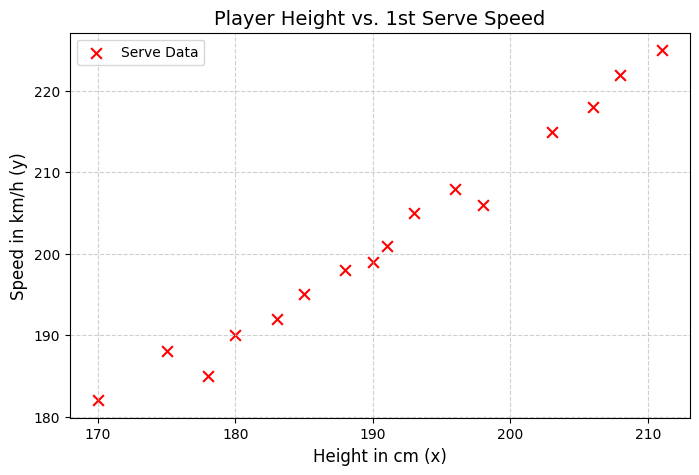

In [ ]:
# Define variables
x = df['height_cm']
y = df['speed_kmh']

# Configure the plot
plt.figure(figsize=(8, 5))

# Create the scatter plot with red crosses ('x')
plt.scatter(x, y, marker='x', color='red', s=60, label='Serve Data')

# Labels and styling
plt.title("Player Height vs. 1st Serve Speed", fontsize=14)
plt.xlabel("Height in cm (x)", fontsize=12)
plt.ylabel("Speed in km/h (y)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show plot
plt.show()

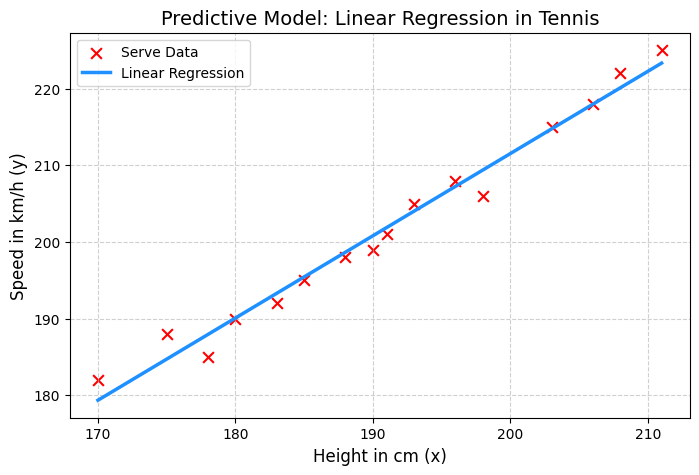

In [ ]:
# 1. Prepare variables for scikit-learn (X must be a 2D array)
X_train = df[['height_cm']]
y_train = df['speed_kmh']

# 2. Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Predict values to draw the regression line
y_pred = model.predict(X_train)

# 4. Plot the final result
plt.figure(figsize=(8, 5))
plt.scatter(x, y, marker='x', color='red', s=60, label='Serve Data')
plt.plot(x, y_pred, color='dodgerblue', linewidth=2.5, label='Linear Regression')

# Labels and styling
plt.title("Predictive Model: Linear Regression in Tennis", fontsize=14)
plt.xlabel("Height in cm (x)", fontsize=12)
plt.ylabel("Speed in km/h (y)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

### Terminology & Notation (Applied to Tennis)

* **Training Set:** The data used to train the model. In our case, this is the table containing the 16 pairs of player heights and serve speeds.
* $x$: The "input" variable or **feature**. For our model, $x$ represents the **Player Height in cm**.
* $y$: The "output" variable or **target** variable. For our model, $y$ represents the **1st Serve Speed in km/h**.
* $m$: The total number of training examples. In our current synthetic dataset, $m = 16$.
* $(x, y)$: A single training example (one specific player's data point).
* $(x^{(i)}, y^{(i)})$: The $i^{th}$ training example in our dataset.

**Example from our data:**
If we look at the very first row of our dataset, the player is 170 cm tall and serves at 182 km/h. We write this as:
* $x^{(1)} = 170$
* $y^{(1)} = 182$

Therefore, our first training example is represented mathematically as:
$$(x^{(1)}, y^{(1)}) = (170, 182)$$

> **Important Note:** The superscript $(i)$ in $x^{(i)}$ is an **index** pointing to a specific row in our data table. It is *not* an exponent (we are not calculating $x$ to the power of $i$).

In [ ]:
# Extract the weight (w) and bias (b) from the model we trained in Cell 3
w = model.coef_[0]
b = model.intercept_

# Print the general notation from Andrew Ng's slide
print("f_{w,b}(x) = wx + b\n")

# Print the exact mathematical formula calculated for your tennis data
print(f"f(x) = {w:.2f}x + {b:.2f}")

f_{w,b}(x) = wx + b

f(x) = 1.07x + -2.88


### The Cost Function $J(w,b)$: Measuring the Error

We use the **Squared Error Cost Function**.

$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

In [ ]:
# 1. Define the Cost Function J(w,b) in Python
def compute_cost(x_features, y_targets, w, b):
    """
    Computes the squared error cost function for linear regression.
    """
    m = len(x_features) # Total number of players
    total_cost = 0

    # 2. Loop through every player to sum up their individual squared errors
    for i in range(m):
        # Predict the speed f(x)
        f_wb = w * x_features[i] + b

        # Calculate the squared difference: (f(x) - y)^2
        cost_i = (f_wb - y_targets[i]) ** 2

        # Add it to the running total
        total_cost = total_cost + cost_i

    # 3. Divide by 2m to get the final average cost J(w,b)
    final_cost = (1 / (2 * m)) * total_cost
    return final_cost

# 4. Run the function using our data and the weights we found
x_array = x.values
y_array = y.values
current_cost = compute_cost(x_array, y_array, w, b)

print(f"J(w,b) = {current_cost:.2f}")

J(w,b) = 1.63


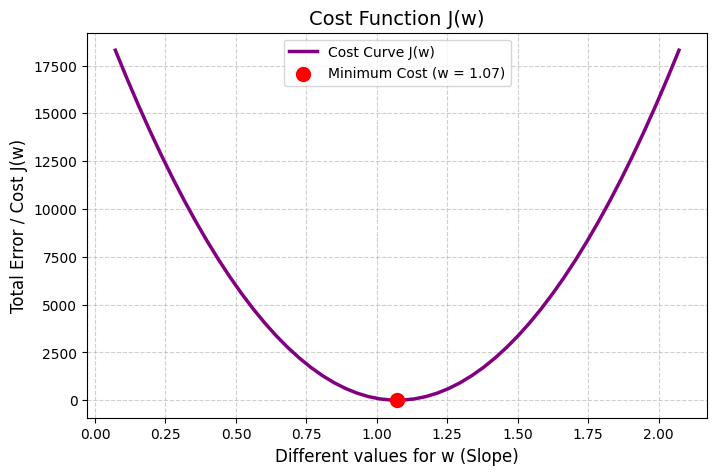

In [ ]:
# 1. We keep 'b' fixed at its optimal value and test different values for 'w'
best_w = w  # from Cell 3
best_b = b  # from Cell 3

# 2. Create an array of 50 different 'w' values (ranging from too small to too large)
w_values = np.linspace(best_w - 1, best_w + 1, 50)
cost_values = []

# 3. Calculate the Cost J(w,b) for every single 'w' in our list
for current_w in w_values:
    # Notice we use 'best_b' every time, only changing 'current_w'
    current_cost = compute_cost(x_array, y_array, current_w, best_b)
    cost_values.append(current_cost)

# 4. Plot the classic U-shaped Cost Function
plt.figure(figsize=(8, 5))
plt.plot(w_values, cost_values, color='purple', linewidth=2.5, label='Cost Curve J(w)')

# 5. Mark the absolute bottom of the bowl (Our model's w)
lowest_cost = compute_cost(x_array, y_array, best_w, best_b)
plt.scatter(best_w, lowest_cost, color='red', s=100, zorder=5,
            label=f'Minimum Cost (w = {best_w:.2f})')

# 6. Labels and Styling
plt.title("Cost Function J(w)", fontsize=14)
plt.xlabel("Different values for w (Slope)", fontsize=12)
plt.ylabel("Total Error / Cost J(w)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()

In [ ]:
# 1. Enable interactive 3D plots in Colab
%matplotlib inline
import plotly.graph_objects as go

# 2. Create the grid of w and b values (same as before)
w_vals = np.linspace(best_w - 0.5, best_w + 0.5, 50)
b_vals = np.linspace(best_b - 50, best_b + 50, 50)
W, B = np.meshgrid(w_vals, b_vals)

# 3. Calculate Cost J for the grid
J_vals = np.zeros(W.shape)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J_vals[i,j] = compute_cost(x_array, y_array, W[i,j], B[i,j])

# 4. Create the interactive 3D surface using Plotly
fig = go.Figure(data=[go.Surface(z=J_vals, x=w_vals, y=b_vals, colorscale='Viridis')])

# 5. Add the "Best Fit" point at the bottom
fig.add_trace(go.Scatter3d(x=[best_w], y=[best_b], z=[lowest_cost],
                         mode='markers', marker=dict(size=10, color='red'),
                         name='Minimum Cost'))

# 6. Update layout for better visibility
fig.update_layout(title='Interactive 3D Cost Function J(w,b)',
                  scene = dict(
                    xaxis_title='Weight (w)',
                    yaxis_title='Bias (b)',
                    zaxis_title='Cost J'),
                  margin=dict(l=0, r=0, b=0, t=40))

fig.show()